In [32]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def fitness_function(x1,x2):
  f1=x1+2*-x2+3
  f2=2*x1+x2-8
  z = f1**2+f2**2
  return z

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  x = np.linspace(position_min, position_max, 80)
  y = np.linspace(position_min, position_max, 80)
  X, Y = np.meshgrid(x, y)
  Z = fitness_function(X, Y)
  ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)
  
  # Animation image placeholder
  images = []

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness_function(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

    # Add plot for each generation (within the generation for-loop)
    image = ax.scatter3D([ particles[n][0] for n in range(population)], [particles[n][1] for n in range(population)], [fitness_function(particles[n][0], particles[n][1]) for n in range(population)], c='b')
    images.append([image])

  # Generate the animation image and save
  animated_image = animation.ArtistAnimation(fig, images)
  animated_image.save('./pso_simple.gif', writer='pillow')

  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)

  return particles

Global Best Position:  [2.59992767 2.79982016]
Best Fitness Value:  1.8786494307206003e-07
Average Particle Best Fitness Value:  0.0009648127770720971
Number of Generation:  67


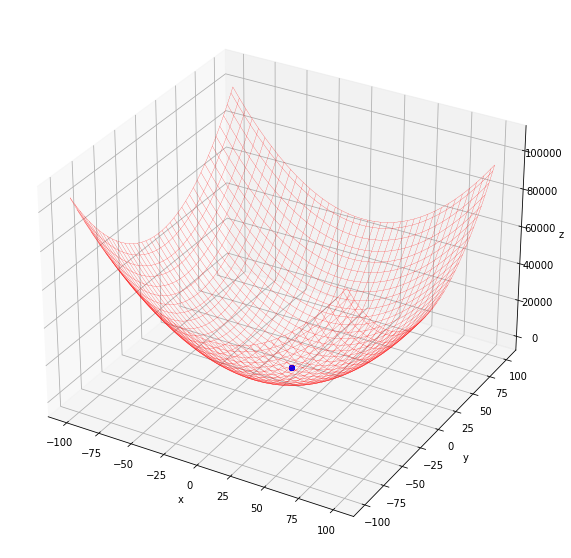

In [33]:
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

particles = pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)